In [76]:
library(rethinking)
library(stats)

Lade nötiges Paket: rstan

Lade nötiges Paket: StanHeaders


rstan version 2.26.16 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file

Lade nötiges Paket: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: D:/Users/Immanuel/Documents/.cmdstan/cmdstan-2.31.0

- CmdStan version: 2.31.0


A newer version of CmdStan is available. See ?install_cmdstan() to install it.
To disable this check set option or environment variable CMDSTANR_NO_VER_CHECK=TRUE.

Lade nötiges Paket: parallel

rethinking (Version 2.31)

In [15]:
results <- read.csv(file = "data\\results.csv", sep = ",", header = TRUE)
dat <- data.frame(
	index = results$index,
	#size = results$size,
	side = results$t,
	temp = results$temp,
	corr12 = 1 / results$correlation_length12,
	corr23 = 1 / results$correlation_length23,
	corr13 = 1 / results$correlation_length13
)
dat

index,side,temp,corr12,corr23,corr13
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0,20,0.0010000,3.532866,1.637955,3.573887
1,20,0.0012589,NaN,1.412467,NaN
2,20,0.0015848,3.615400,4.835851,5.669222
3,20,0.0019952,2.995542,1.119138,8.854110
4,20,0.0025118,3.706150,1.267008,4.452134
5,20,0.0031622,3.339868,1.475977,NaN
6,20,0.0039810,4.796226,1.639125,NaN
7,20,0.0050118,5.691565,3.526210,NaN
8,20,0.0063095,10.156849,1.528674,NaN


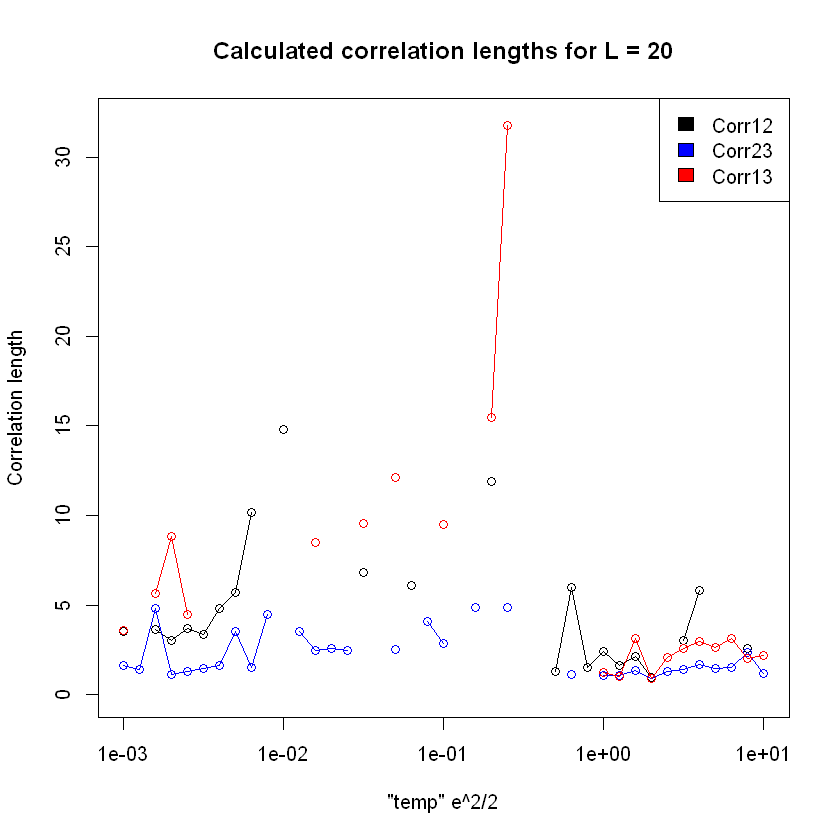

In [52]:
d <- dat[dat$side == 20, ]
plot(corr12 ~ temp,
	data = d,
	xlim = c(1e-3, 1e1),
	ylim = c(0, 32),
	log = c('x'),
	ylab = "Correlation length",
	xlab = "\"temp\" e^2/2"
)
lines(d$temp, d$corr12)
title("Calculated correlation lengths for L = 20")
points(d$temp, d$corr23, col = "blue")
lines(d$temp, d$corr23, col = "blue")
points(d$temp, d$corr13, col = "red")
lines(d$temp, d$corr13, col = "red")
legend("topright", c("Corr12", "Corr23", "Corr13"), fill = c("black", "blue", "red"))

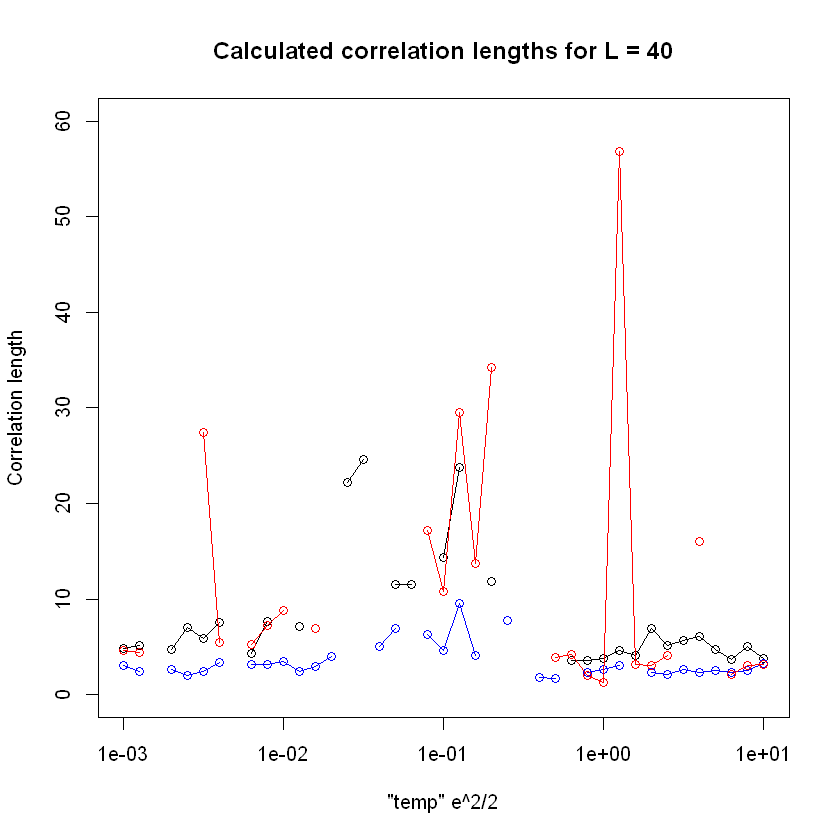

In [53]:
d <- dat[dat$side == 40, ]
plot(corr12 ~ temp,
	data = d,
	xlim = c(1e-3, 1e1),
	ylim = c(0, 60),
	log = c('x'),
	ylab = "Correlation length",
	xlab = "\"temp\" e^2/2"
)
lines(d$temp, d$corr12)
title("Calculated correlation lengths for L = 40")
points(d$temp, d$corr23, col = "blue")
lines(d$temp, d$corr23, col = "blue")
points(d$temp, d$corr13, col = "red")
lines(d$temp, d$corr13, col = "red")

It seems that the second moment approach yields data of wildly varying quiality, excluding the fact that sometimes its outright cant calculate from the data. Lets see if that changes if we fit the data.

In [88]:
indices_lst <- c()
m_means <- c()

for (index in dat$index) {
d <- read.csv(file = paste("data\\plot_data\\correlation_", index, ".csv", sep = ""), sep = ",", header = FALSE)
colnames(d) <- c("corr_fn")
d$index <- 0:(nrow(d) - 1)
d$corr_fn <- d$corr_fn[nrow(d)/2 + 1] - d$corr_fn

model <- ulam(
	alist(
		corr_fn ~ dnorm(mu, sigma),
		mu <- A * (cosh(m * (index - 10)) - 1),
		A ~ dnorm(500, 1000),
		m ~ dexp(10),
		# beta_half ~ dnorm(5, 2),
		sigma ~ dunif(0, 1000)
	),
	constraints = list(A="lower=0", m="lower=0"),
	data = d, chains = 8, cores = 8, # log_lik = TRUE
)

indices_lst <- append(indices_lst, index)
m_means <- append(m_means, precis(model)$mean[2])

}

indices_lst
m_means

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb87d816f16.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb838aa19e.hpp:3:
stan/lib/stan_math/lib/bo

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb838aa19e.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb838aa19e.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance

Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb838aa19e.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb838aa19e.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance

Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb838aa19e.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb838aa19e.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance

Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 5 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 5 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 5 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 

Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb838aa19e.stan', line 18, column 4 to column 35)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 

Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb838aa19e.stan', line 18, column 4 to column 35)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance

Chain 1 finished in 0.1 seconds.
Chain 2 finished in 0.1 seconds.
Chain 3 finished in 0.1 seconds.
Chain 4 finished in 0.1 seconds.
Chain 5 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 5 finished in 0.1 seconds.
Chain 6 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 6 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 6 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 6 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 6 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 6 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 6 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 6 finished in 0.2 seconds.
Chain 8 finished in 0.1 seconds.
Chain 7 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 7 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 7 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 7 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 7 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 7 finished in 0.8 seconds.

All 8 chains finished successfully.
Mean chain execution time: 0.2 seconds.
Total ex

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb875eb37a9.stan', line 18, column 4 to column 35)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 900 /

Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb875eb37a9.stan', line 18, column 4 to column 35)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 8 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 8 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 8 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 finished in 0.1 seconds.
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 finished in 0.2 seconds.
Chain 3 finished in 0.1 seconds.
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8157f258.hpp:3:
stan/lib/stan_math/lib/bo

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8157f258.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8157f258.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance

Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 7 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 7 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 7 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 7 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 7 Iteration: 1000 / 1000

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8582f24ae.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8582f24ae.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8582f24ae.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8582f24ae.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 6 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 6 Iteration: 600 / 1000 [ 

Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8582f24ae.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 



Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.2 seconds.
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 finished in 0.1 seconds.
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 3 finished in 0.1 seconds.
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 4 finished in 0.1 seconds.
Chain 5 Iteration: 400 / 1

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb832241d71.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb832241d71.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb832241d71.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb832241d71.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 5 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 5 Iteration: 800 /

Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb832241d71.stan', line 18, column 4 to column 35)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 



Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 6 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 6 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 7 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 7 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb854df40c3.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iterat

Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb854df40c3.stan', line 18, column 4 to column 35)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 



Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.4 seconds.
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 finished in 0.2 seconds.
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 3 finished in 0.2 seconds.
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Ch

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb86e6e6694.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iter

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb855914451.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteratio

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8b5d1937.hpp:3:
stan/lib/stan_math/lib/bo

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 1

Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8b5d1937.stan', line 18, column 4 to column 35)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 


Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8b5d1937.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 



Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.3 seconds.
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 finished in 0.3 seconds.
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmu

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb87ce544f0.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb87ce544f0.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (S

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb82aaf3810.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration:

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8581c52c7.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 2

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8595f109.hpp:3:
stan/lib/stan_math/lib/bo

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8595f109.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8595f109.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 


Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8595f109.stan', line 18, column 4 to column 35)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 



Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8263763aa.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8263763aa.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (S

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8144e54d9.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8144e54d9.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (W

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8e082d6.hpp:3:
stan/lib/stan_math/lib/boo

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8e082d6.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 300 / 1000 

See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cw

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 3

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8529b6eb5.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8529b6eb5.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8529b6eb5.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 


Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8529b6eb5.stan', line 18, column 4 to column 35)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 

Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8529b6eb5.stan', line 18, column 4 to column 35)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 finished in 0.5 seconds.
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (War

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8312c7b56.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8312c7b56.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 



Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb83b46638a.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb83b46638a.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb83b46638a.stan', line 18, column 4 to column 35)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 



Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 

See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cw

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 3

See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cw

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 2

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb813652112.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]

See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cw

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb832047ca9.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb832047ca9.stan', line 18, column 4 to column 35)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 



Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb85fb375f3.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb85fb375f3.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 



Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (W

See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cw

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8165a2fc3.stan', line 18, column 4 to column 35)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8165a2fc3.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8165a2fc3.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration:   1 / 1000 [  0

Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8165a2fc3.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 



Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.2 seconds.
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 finished in 0.2 seconds.
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 3 finished in 0.2 seconds.
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8f214dfe.hpp:3:
stan/lib/stan_math/lib/bo

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 

Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8f214dfe.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 



Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.2 seconds.
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 finished in 0.2 seconds.
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 3 finished in 0.1 seconds.
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 4 finished in 0.4 seconds.
Chain 5 Iteration: 600 /

See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cw

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb83cc05c92.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb83cc05c92.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 5 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 5 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 5 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb82a2d3f7d.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb82a2d3f7d.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 



Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 8 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 8 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 8 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 finished in 0.1 seconds.
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 finished in 0.2 seconds.
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 3 finished in 0.1 seconds.
Chain 4 finished in 0.1 seconds.
Chain 5 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 5 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 5 finished in 0.1 seconds.
Chain 6 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 6 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 6 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 6 Iteration: 900 / 1000 [ 90%]  (Sampl

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb845565f43.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb845565f43.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb845565f43.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 5 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 5 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 

Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb845565f43.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 



Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 8 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 8 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 8 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 8 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 finished in 0.1 seconds.
Chain 2 finished in 0.1 seconds.
Chain 3 finished in 0.1 seconds.
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 4 finished in 0.1 seconds.
Chain 5 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 5 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 5 finished in 0.1 seconds.
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 6 Iteration: 501 / 1000 [ 50%]  (Sampling) 

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb862db4647.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb862db4647.stan', line 18, column 4 to column 35)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb862db4647.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb862db4647.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb862db4647.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance mat

Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 5 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 5 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 5 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 5 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 6 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 6 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 6 Iteration: 700 

Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb862db4647.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 

Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb862db4647.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 8 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 8 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 8 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 8 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 8 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 8 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 8 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.1 seconds.
Chain 2 finished in 0.1 seconds.
Chain 3 finished in 0.1 seconds.
Chain 4 finished in 0.1 seconds.
Chain 5 finished in 0.1 seconds.
Chain 6 finished in 0.1 seconds.
Chain 7 finished in 0.1 seconds.
Chain 8 finished in 0.1 seconds.

All 8 chains finished successfully.
Mean chain execution time: 0.1 seconds.
Total execution time: 0.5 seconds.



In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8214d2aec.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8214d2aec.stan', line 18, column 4 to column 35)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8214d2aec.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8214d2aec.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8214d2aec.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8214d2aec.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 5 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 5 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 5 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 5 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8214d2aec.stan', line 18, column 4 to column 35)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 



Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 6 Iteration: 501 / 1000 [ 50%]  (Sampling) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8214d2aec.stan', line 18, column 4 to column 35)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 

Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8214d2aec.stan', line 18, column 4 to column 35)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 7 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 7 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 7 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 7 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 7 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 8 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 8 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 8 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 8 Iteration: 700 

Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8214d2aec.stan', line 18, column 4 to column 35)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 

Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8214d2aec.stan', line 18, column 4 to column 35)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 1 finished in 0.1 seconds.
Chain 2 finished in 0.1 seconds.
Chain 3 finished in 0.1 seconds.
Chain 4 finished in 0.1 seconds.
Chain 5 finished in 0.1 seconds.
Chain 6 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 6 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 6 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 6 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 6 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 6 finished in 0.2 seconds.
Chain 7 finished in 0.1 seconds.
Chain 8 finished in 0.1 seconds.

All 8 chains finished successfully.
Mean chain execution time: 0.1 seconds.
Total execution time: 0.6 seconds.



In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb873296818.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb873296818.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb873296818.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance mat

Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 5 Iteration: 700 

Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb873296818.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 

Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb873296818.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 8 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 8 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 8 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 8 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 8 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 8 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 8 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb873296818.stan', line 18, column 4 to column 35)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 



Chain 1 finished in 0.1 seconds.
Chain 2 finished in 0.1 seconds.
Chain 3 finished in 0.1 seconds.
Chain 4 finished in 0.1 seconds.
Chain 5 finished in 0.1 seconds.
Chain 6 finished in 0.1 seconds.
Chain 7 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 7 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 7 finished in 0.1 seconds.
Chain 8 finished in 0.1 seconds.

All 8 chains finished successfully.
Mean chain execution time: 0.1 seconds.
Total execution time: 0.5 seconds.



In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb834455ce6.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb834455ce6.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 5 Iteration: 700 

Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb834455ce6.stan', line 18, column 4 to column 35)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 8 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 8 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 8 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 8 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 8 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 finished in 0.1 seconds.
Chain 2 finished in 0.1 seconds.
Chain 3 finished in 0.1 seconds.
Chain 4 finished in 0.1 seconds.
Chain 5 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 5 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 5 finished in 0.1 seconds.
Chain 

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb82b470e6.hpp:3:
stan/lib/stan_math/lib/bo

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8266b5827.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8266b5827.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8266b5827.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8266b5827.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 5 Iteration: 700 

Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8266b5827.stan', line 18, column 4 to column 35)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 



Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 7 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 7 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 7 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 7 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 7 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8266b5827.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 

Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8266b5827.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 8 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 8 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 finished in 0.1 seconds.
Chain 2 finished in 0.1 seconds.
Chain 3 finished in 0.1 seconds.
Chain 4 finished in 0.1 seconds.
Chain 5 finished in 0.1 seconds.
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 6 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 6 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 6 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 6 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 6 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 6 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 6 finished in 0.2 seconds.
Chain 7 finished in 0.1 seconds.
Chain 8 Iteration: 600 / 1000 [ 60

See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cw

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8329b2ca5.stan', line 18, column 4 to column 35)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8329b2ca5.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8329b2ca5.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 5 Iteration: 700 

Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8329b2ca5.stan', line 18, column 4 to column 35)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 



Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 6 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 6 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 6 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 6 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 6 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 6 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8329b2ca5.stan', line 18, column 4 to column 35)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 7 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 7 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 7 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 7 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 7 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 8 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 8 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 8 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 8 Iteration: 700 

Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8329b2ca5.stan', line 18, column 4 to column 35)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 



Chain 1 finished in 0.1 seconds.
Chain 2 finished in 0.1 seconds.
Chain 3 finished in 0.1 seconds.
Chain 4 finished in 0.1 seconds.
Chain 5 finished in 0.1 seconds.
Chain 6 finished in 0.1 seconds.
Chain 7 finished in 0.1 seconds.
Chain 8 finished in 0.1 seconds.

All 8 chains finished successfully.
Mean chain execution time: 0.1 seconds.
Total execution time: 0.5 seconds.



In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb823bd31d3.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb823bd31d3.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb823bd31d3.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb823bd31d3.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb823bd31d3.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb823bd31d3.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 5 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 5 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 5 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 5 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb823bd31d3.stan', line 18, column 4 to column 35)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 

Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb823bd31d3.stan', line 18, column 4 to column 35)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 6 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 6 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 6 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 6 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 6 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 6 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb823bd31d3.stan', line 18, column 4 to column 35)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 7 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 7 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 7 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 7 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 7 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 8 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 8 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 8 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 8 Iteration: 700 

Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb823bd31d3.stan', line 18, column 4 to column 35)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 



Chain 1 finished in 0.1 seconds.
Chain 2 finished in 0.1 seconds.
Chain 3 finished in 0.1 seconds.
Chain 4 finished in 0.1 seconds.
Chain 5 finished in 0.0 seconds.
Chain 6 finished in 0.1 seconds.
Chain 7 finished in 0.0 seconds.
Chain 8 finished in 0.1 seconds.

All 8 chains finished successfully.
Mean chain execution time: 0.1 seconds.
Total execution time: 0.6 seconds.



In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb84a253f7a.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb84b1f26d1.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cw

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb812cd6384.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 

Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb812cd6384.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 

Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb812cd6384.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 8 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 8 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 8 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 8 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 8 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 8 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 8 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb812cd6384.stan', line 18, column 4 to column 35)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 



Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.2 seconds.
Chain 2 finished in 0.1 seconds.
Chain 3 finished in 0.1 seconds.
Chain 4 finished in 0.1 seconds.
Chain 5 finished in 0.1 seconds.
Chain 6 finished in 0.1 seconds.
Chain 7 finished in 0.1 seconds.
Chain 8 finished in 0.1 seconds.

All 8 chains finished successfully.
Mean chain execution time: 0.1 seconds.
Total execution time: 0.5 seconds.



See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cw

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb84d08359a.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 10

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb859a01dc2.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 5 Iteration: 700 

See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cw

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3

Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb837f9589d.stan', line 18, column 4 to column 35)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 

Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb837f9589d.stan', line 18, column 4 to column 35)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.2 seconds.
Chain 2 finished in 0.1 seconds.
Chain 3 finished in 0.1 seconds.
Chain 5 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 5 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 5 finished in 0.1 seconds.
Chain 6 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 6 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 6 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 6 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 6 finished in 0.2 seconds.
Chain 7 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 7 Iteration: 900 / 1000 [ 90%]  

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb824a75906.stan', line 18, column 4 to column 35)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Location parameter[26] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb824a75906.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 5 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 5 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 5 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 6 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 6 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 6 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 6 Iteration: 800 /

Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb824a75906.stan', line 18, column 4 to column 35)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 

Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb824a75906.stan', line 18, column 4 to column 35)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.1 seconds.
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 3 finished in 0.3 seconds.
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 4 finished in 0.2 seconds.
Chain 5 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 5 finished in 0.1 seconds.
Chain 6 finished in 0.1 seconds.
Chain 7 finished in 0.1 seconds.
Chain 8 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 8 Iteration: 700 / 1000 [ 70%]  (Sampling) 


See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb818fd7540.stan', line 18, column 4 to column 35)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb818fd7540.stan', line 18, column 4 to column 35)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb818fd7540.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb818fd7540.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb85c60425.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb85c60425.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance

Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 6 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 6 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 6 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 6 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb811c72c22.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 60%]  (Sampling) 


Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb811c72c22.stan', line 18, column 4 to column 35)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 

Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb811c72c22.stan', line 18, column 4 to column 35)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 6 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 6 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 6 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 6 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 6 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 6 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 

See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cw

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iterat

Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb82ebb3dee.stan', line 18, column 4 to column 35)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 



Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 6 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 


Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb82ebb3dee.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 



Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 8 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 8 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 8 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 8 Iteration: 700 / 1000 [ 70%]  (Sampling) 


Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb82ebb3dee.stan', line 18, column 4 to column 35)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 

Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb82ebb3dee.stan', line 18, column 4 to column 35)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.3 seconds.
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 finished in 0.2 seconds.
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1000 / 1000 [100%]  (

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iter

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb85cf85f1.stan', line 18, column 4 to column 35)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb85cf85f1.stan', line 18, column 4 to column 35)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance

Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from s

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb85b814f70.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[25] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb85b814f70.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covaria

Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb827751230.stan', line 18, column 4 to column 35)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 



Chain 1 finished in 0.1 seconds.
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 finished in 0.2 seconds.
Chain 3 finished in 0.1 seconds.
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 4 finished in 0.2 seconds.
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 5 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 5 Iteration: 800 /

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iterat

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 It

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iterat

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb815126a8e.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 60

See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cw

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iterat

Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb87b3c5071.stan', line 18, column 4 to column 35)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 



Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 7 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 

See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cw

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iterat

Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb877c72f3b.stan', line 18, column 4 to column 35)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 



Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.2 seconds.
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 finished in 0.3 seconds.
Chain 3 finished in 0.1 seconds.
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain

See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cw

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iterat

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8b157807.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8b157807.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance

Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 10

Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8b157807.stan', line 18, column 4 to column 35)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 



Chain 5 finished in 0.2 seconds.
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 6 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 6 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 6 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 6 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 6 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 6 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 6 finished in 0.2 seconds.
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 7 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 7 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 7 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 7 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 7 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 7 finished in 0.3 seconds.
Chain 8 fin

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb82f1c4fe.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb82f1c4fe.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance

Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1

Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb82f1c4fe.stan', line 18, column 4 to column 35)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 7 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.2 seconds.
Chain 2 finished in 0.0 seconds.
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 I

See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cw

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iterat

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb869962c8e.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb88b4247.stan', line 18, column 4 to column 35)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 800 /

Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb88b4247.stan', line 18, column 4 to column 35)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 

Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb88b4247.stan', line 18, column 4 to column 35)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrice

Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 7 Iteration: 600 / 1000 [ 60%]  (Sampling) 


Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb88b4247.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 



Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 8 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 8 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 8 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.1 seconds.
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 finished in 0.1 seconds.
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 3 finished in 0.1 seconds.
Chain 4 finished in 0.0 seconds.
Chain 5 finished in 0.1 seconds.
Chain 6 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 6 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 6 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 6 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 6 finished in 0.2 seconds.
Chain 7 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 7 It

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb82f4d7099.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 



Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 8 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 8 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 8 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 8 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 finished in 0.1 seconds.
Chain 2 finished in 0.1 seconds.
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 3 finished in 0.2 seconds.
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteratio

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb84d2502.stan', line 18, column 4 to column 35)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 100

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb84d2502.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 


Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Location parameter[30] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb84d2502.stan', line 18, column 4 to column 35)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 



Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 6 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 6 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 6 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 6 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 6 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 6 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 7 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 8 Iteration:   1 

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8100c14be.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 5 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 5 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 5 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 6 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 6 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 6 Iteration: 700 / 1000 [ 70%]  (Sampling) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8100c14be.stan', line 18, column 4 to column 35)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 7 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 7 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 7 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 finished in 0.1 seconds.
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Samp

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb836a24e62.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[40] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb836a24e62.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 5 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 5 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 5 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 5 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 6 Iteration:   1 

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4

Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Location parameter[25] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb824d265dc.stan', line 18, column 4 to column 35)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 

Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb824d265dc.stan', line 18, column 4 to column 35)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covaria

Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 7 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 8 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 8 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 8 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 finished in 0.1 seconds.
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb824d265dc.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 3 finished in 0.2 seconds.
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 4 finished in 0.2 seconds.
Chain 5 finished in 0.1 seconds.
Chain 6 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 6 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 6 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 6 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 6 finished in 0.2 seconds.
Chain 7 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 7 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 7 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 7 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 7 finished in 0.1 seconds.
Chain 8 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 8 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 8 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 8 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 8 finished in 0.1 seconds

See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cw

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb830522880.stan', line 18, column 4 to column 35)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 

Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb830522880.stan', line 18, column 4 to column 35)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 7 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 7 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 7 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 7 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 7 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb830522880.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 



Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 8 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 8 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 8 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 8 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 8 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 8 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 8 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb830522880.stan', line 18, column 4 to column 35)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 



Chain 1 finished in 0.1 seconds.
Chain 2 finished in 0.1 seconds.
Chain 3 finished in 0.1 seconds.
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 4 finished in 0.1 seconds.
Chain 5 finished in 0.1 seconds.
Chain 6 finished in 0.1 seconds.
Chain 7 finished in 0.1 seconds.
Chain 8 finished in 0.1 seconds.

All 8 chains finished successfully.
Mean chain execution time: 0.1 seconds.
Total execution time: 0.5 seconds.



See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb86ed2d65.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb86ed2d65.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matri

Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb86ed2d65.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 5 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 5 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 5 Iteration: 900 / 1000 [ 90%]  (Sampling) 


Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb86ed2d65.stan', line 18, column 4 to column 35)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 

Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb86ed2d65.stan', line 18, column 4 to column 35)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance

Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 6 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 6 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 6 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 7 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 7 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 7 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 7 Iteration: 900 / 1000 [ 90%]  (Sampling) 


Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb86ed2d65.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 

Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb86ed2d65.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matri

Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 8 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 8 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 8 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 8 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 8 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 8 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 8 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.1 seconds.
Chain 2 finished in 0.1 seconds.
Chain 4 finished in 0.1 seconds.
Chain 5 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 5 finished in 0.1 seconds.
Chain 6 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 6 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 6 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 6 finished in 0.1 seconds.
Chain 7 Iteration: 1000 / 1000 [100%]  (Samp

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 

Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb874972f86.stan', line 18, column 4 to column 35)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 


Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Location parameter[29] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb874972f86.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 

Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb874972f86.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covaria

Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 8 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 8 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 8 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 8 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 8 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 8 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 8 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.1 seconds.
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 finished in 0.2 seconds.
Chain 3 finished in 0.1 seconds.
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 It

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Location parameter[24] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb811d2252.stan', line 18, column 4 to column 35)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb811d2252.stan', line 18, column 4 to column 35)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covarianc

Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 

Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb811d2252.stan', line 18, column 4 to column 35)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 



Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 6 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 6 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 6 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 6 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 6 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 6 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Location parameter[24] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb811d2252.stan', line 18, column 4 to column 35)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 

Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb811d2252.stan', line 18, column 4 to column 35)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covarianc

Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 7 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 7 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 7 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 7 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 7 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb811d2252.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 

Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb811d2252.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance

Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 8 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 8 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 8 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 8 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 8 Iteration: 800 / 1000 [ 80%]  (Sampling) 


Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb811d2252.stan', line 18, column 4 to column 35)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 



Chain 1 finished in 0.1 seconds.
Chain 2 finished in 0.0 seconds.
Chain 3 finished in 0.1 seconds.
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 4 finished in 0.2 seconds.
Chain 5 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 5 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 5 finished in 0.1 seconds.
Chain 6 finished in 0.1 seconds.
Chain 7 finished in 0.1 seconds.
Chain 8 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 8 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 8 finished in 0.1 seconds.

All 8 chains finished successfully.
Mean chain execution time: 0.1 seconds.
Total execution time: 0.6 seconds.



See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cw

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 

Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8485d1694.stan', line 18, column 4 to column 35)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 



Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 6 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 8 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 8 Iteration: 501 / 1000 [ 50%]

In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb83008356b.hpp:3:
stan/lib/stan_math/lib/b

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 It

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb83008356b.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb83008356b.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 6 Iteration: 501 / 1000 [ 50%]  (Sampling) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb83008356b.stan', line 18, column 4 to column 35)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 7 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 7 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 7 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 7 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 7 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 80

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8352556bd.stan', line 18, column 4 to column 35)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8352556bd.stan', line 18, column 4 to column 35)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 2 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 2 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 2 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8352556bd.stan', line 18, column 4 to column 35)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8352556bd.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8352556bd.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covarian

Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 5 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 5 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 5 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 5 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 

Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8352556bd.stan', line 18, column 4 to column 35)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 



Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.1 seconds.
Chain 2 finished in 0.1 seconds.
Chain 3 finished in 0.1 seconds.
Chain 5 finished in 0.0 seconds.
Chain 6 finished in 0.0 seconds.
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 7 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 7 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 7 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 7 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 7 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 7 finished in 0.2 seconds.
Chain 8 finished in 0.1 seconds.
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 4 finished i

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
              

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8e9bfdb.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8e9bfdb.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance m

Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 4 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 5 Iteration: 700 

Chain 5 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 5 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8e9bfdb.stan', line 18, column 4 to column 35)

Chain 5 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 5 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 5 



Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 7 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 7 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 7 Iteration: 800 / 1000 [ 80%]  (Sampling) 


Chain 7 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 7 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8e9bfdb.stan', line 18, column 4 to column 35)

Chain 7 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 7 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 7 



Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 8 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 8 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 8 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 8 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 8 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 8 Iteration: 900 / 1000 [ 90%]  (Sampling) 


Chain 8 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 8 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb8e9bfdb.stan', line 18, column 4 to column 35)

Chain 8 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 8 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 8 



Chain 1 finished in 0.1 seconds.
Chain 2 finished in 0.1 seconds.
Chain 3 finished in 0.1 seconds.
Chain 4 finished in 0.1 seconds.
Chain 5 finished in 0.1 seconds.
Chain 6 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 6 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 6 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 6 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 6 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 6 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 6 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 6 finished in 0.1 seconds.
Chain 7 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 7 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 7 finished in 0.1 seconds.
Chain 8 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 8 finished in 0.1 seconds.

All 8 chains finished successfully.
Mean chain execution time: 0.1 seconds.
Total execution time: 0.5 seconds.



See https://mc-stan.org/misc/warnings for details.


In file included from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array/multi_array_ref.hpp:32,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/multi_array.hpp:34,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint/algebra/multi_array_algebra.hpp:22,
                 from stan/lib/stan_math/lib/boost_1.78.0/boost/numeric/odeint.hpp:63,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:14,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:198,
                 from stan/lib/stan_math/stan/math/rev.hpp:10,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:4,
                 from C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cw

Running MCMC with 8 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Location parameter[33] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb87ceb1544.stan', line 18, column 4 to column 35)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 4 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 4 Iteration: 900 / 1000 [ 90%]  (Sampling) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Location parameter[1] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb87ceb1544.stan', line 18, column 4 to column 35)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 5 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 5 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 5 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 5 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 5 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 5 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 5 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 5 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 5 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 5 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 5 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 5 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 6 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 6 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 6 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 6 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 6 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 6 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 6 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 6 Iteration: 600 / 1000 [ 60%]  (Sampling) 


Chain 6 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 6 Exception: normal_lpdf: Location parameter[35] is inf, but must be finite! (in 'C:/Users/Immanuel/AppData/Local/Temp/RtmpY5cwkE/model-2eb87ceb1544.stan', line 18, column 4 to column 35)

Chain 6 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 6 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 6 



Chain 7 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 7 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 7 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 7 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 7 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 7 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 7 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 7 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 7 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 7 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 7 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 7 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 8 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 8 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 8 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 8 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 8 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 8 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 8 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 8 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 8 Iteration: 700 

See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.




[1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
[51] 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
[76] 75 76 77 78 79 80 81

[1] 0.1839661805 0.2308880346 0.1639509874 0.1367461353 0.1304229973
 [6] 0.1077519459 0.0952511246 0.0811220034 0.0805578548 0.1588825363
[11] 0.0702792744 0.0636194820 0.0646376688 0.2331428100 0.0754766324
[16] 0.0420037896 0.1184489861 0.0586061008 0.0633600483 0.0397923353
[21] 0.0600042239 0.0293616165 0.0515618686 0.0221039463 0.0617695390
[26] 0.2694874405 0.4619965766 0.0046385001 0.0034772832 0.0013447938
[31] 0.0005716544 0.0001950538 0.0001085426 0.0003238210 0.1027747302
[36] 0.0188060094 0.0146747275 0.0200572315 0.0840513649 0.0759066627
[41] 0.0979511338 0.5115366228 0.4148468037 0.4084221046 0.7616916259
[46] 0.0872407170 0.7848700294 0.4828109226 0.6252182163 0.3635410657
[51] 0.5457359159 1.2200693729 0.8892302239 1.0507503059 0.8206729519
[56] 0.3548384693 0.3795966827 0.3543074346 0.7316403996 0.0219670581
[61] 0.4849713246 0.3429565468 0.4543630320 1.0158711097 0.0363257139
[66] 1.1450952376 0.9677233182 0.6961485715 0.5061010856 0.9607799096
[71] 0.0003300687 1.6474959109 0.5039332744 1.2263307351 0.4741379603
[76] 1.5005112758 0.3462334582 0.0317970679 0.9556212339 0.4251002741
[81] 0.7408373151 1.1463317856

In [89]:
indices_lst

[1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
[51] 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
[76] 75 76 77 78 79 80 81

In [90]:
m_means

[1] 0.1839661805 0.2308880346 0.1639509874 0.1367461353 0.1304229973
 [6] 0.1077519459 0.0952511246 0.0811220034 0.0805578548 0.1588825363
[11] 0.0702792744 0.0636194820 0.0646376688 0.2331428100 0.0754766324
[16] 0.0420037896 0.1184489861 0.0586061008 0.0633600483 0.0397923353
[21] 0.0600042239 0.0293616165 0.0515618686 0.0221039463 0.0617695390
[26] 0.2694874405 0.4619965766 0.0046385001 0.0034772832 0.0013447938
[31] 0.0005716544 0.0001950538 0.0001085426 0.0003238210 0.1027747302
[36] 0.0188060094 0.0146747275 0.0200572315 0.0840513649 0.0759066627
[41] 0.0979511338 0.5115366228 0.4148468037 0.4084221046 0.7616916259
[46] 0.0872407170 0.7848700294 0.4828109226 0.6252182163 0.3635410657
[51] 0.5457359159 1.2200693729 0.8892302239 1.0507503059 0.8206729519
[56] 0.3548384693 0.3795966827 0.3543074346 0.7316403996 0.0219670581
[61] 0.4849713246 0.3429565468 0.4543630320 1.0158711097 0.0363257139
[66] 1.1450952376 0.9677233182 0.6961485715 0.5061010856 0.9607799096
[71] 0.0003300687 1.6474959109 0.5039332744 1.2263307351 0.4741379603
[76] 1.5005112758 0.3462334582 0.0317970679 0.9556212339 0.4251002741
[81] 0.7408373151 1.1463317856

In [91]:
dat$corr_length_least_squares <- 1 / m_means

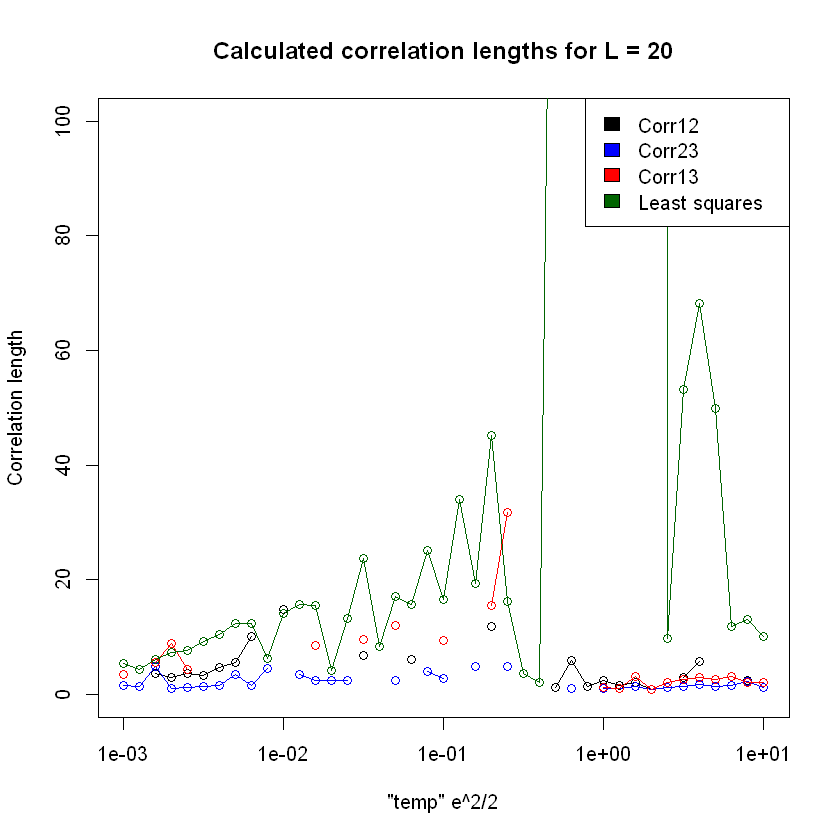

In [95]:
d <- dat[dat$side == 20, ]
plot(corr12 ~ temp,
	data = d,
	xlim = c(1e-3, 1e1),
	ylim = c(0, 100),
	log = c('x'),
	ylab = "Correlation length",
	xlab = "\"temp\" e^2/2"
)
lines(d$temp, d$corr12)
title("Calculated correlation lengths for L = 20")
points(d$temp, d$corr23, col = "blue")
lines(d$temp, d$corr23, col = "blue")
points(d$temp, d$corr13, col = "red")
lines(d$temp, d$corr13, col = "red")
points(d$temp, d$corr_length_least_squares, col = "darkgreen")
lines(d$temp, d$corr_length_least_squares, col = "darkgreen")
legend("topright", c("Corr12", "Corr23", "Corr13", "Least squares"), fill = c("black", "blue", "red", "darkgreen"))

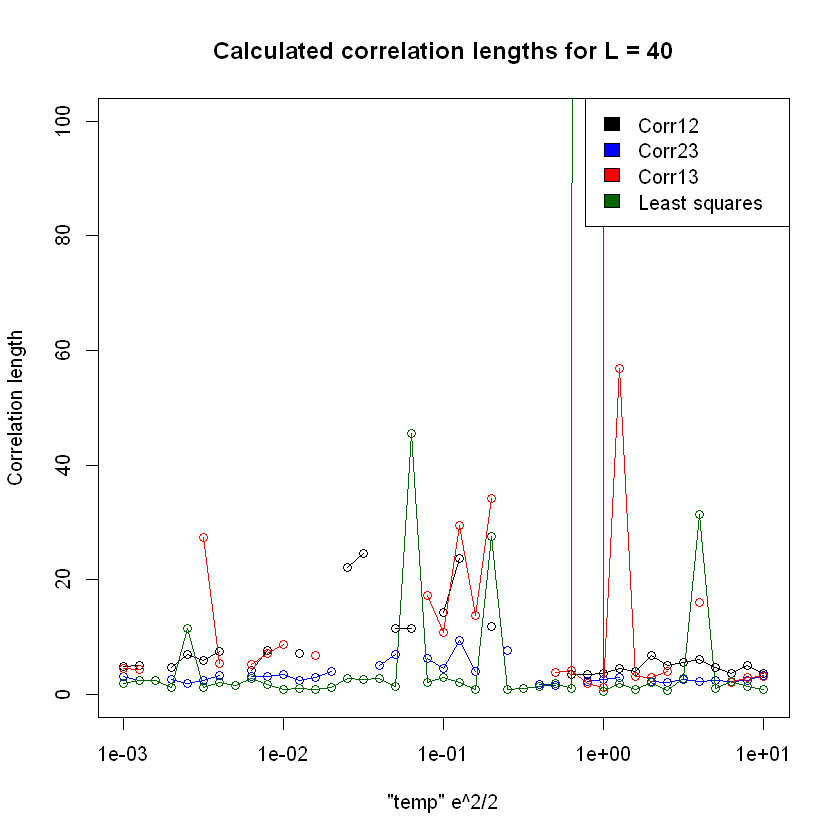

In [96]:
d <- dat[dat$side == 40, ]
plot(corr12 ~ temp,
	data = d,
	xlim = c(1e-3, 1e1),
	ylim = c(0, 100),
	log = c('x'),
	ylab = "Correlation length",
	xlab = "\"temp\" e^2/2"
)
lines(d$temp, d$corr12)
title("Calculated correlation lengths for L = 40")
points(d$temp, d$corr23, col = "blue")
lines(d$temp, d$corr23, col = "blue")
points(d$temp, d$corr13, col = "red")
lines(d$temp, d$corr13, col = "red")
points(d$temp, d$corr_length_least_squares, col = "darkgreen")
lines(d$temp, d$corr_length_least_squares, col = "darkgreen")
legend("topright", c("Corr12", "Corr23", "Corr13", "Least squares"), fill = c("black", "blue", "red", "darkgreen"))

In [97]:
write.csv(dat, "data\\least_squares_data.csv")